# Corona detection from X_ray images

The goal of this project is to detect **COVID19** and **PNEUMONIA** from X_ray images.

Dataset : https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

COVID-19 (coronavirus disease 2019) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), a strain of coronavirus. The first cases were seen in Wuhan, China, in late December 2019 before spreading globally. The current outbreak was officially recognized as a pandemic by the World Health Organization (WHO) on 11 March 2020.
Currently Reverse transcription polymerase chain reaction (RT-PCR) is used for diagnosis of the COVID-19. X-ray machines are widely available and provide images for diagnosis quickly so chest X-ray images can be very useful in early diagnosis of COVID-19.

Dataset is organized into 2 folders (train, test) and both train and test contain 3 subfolders (COVID19, PNEUMONIA, NORMAL). DataSet contains total 6432 x-ray images and test data have 20% of total images.

The ResNet50 model will be used to detect COVID19 & PNEUMONIA from the images

### Importing Libraries 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [4]:
# some constant values
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

### Loading data
- Training data
- Testing data
- Validation data

In [5]:
# Training data
train = tf.keras.preprocessing.image_dataset_from_directory(
    "data/train",
    seed=123,
    label_mode = 'categorical',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4502 files belonging to 3 classes.


In [6]:
class_names = train.class_names
class_names

['COVID19', 'NORMAL', 'PNEUMONIA']

In [8]:
# Validation data
validation = tf.keras.preprocessing.image_dataset_from_directory(
    "data/val",
    seed=123,
    label_mode = 'categorical',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 645 files belonging to 3 classes.


# Model training

In [9]:
resnet = tf.keras.applications.ResNet50(
    include_top=False, # own input and output layers 
    input_shape= (IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
    pooling='max',
    classes=3,
    weights = 'imagenet')

In [10]:
# we will not train the model on the existing weights of the model
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# Now I will add my layers to the resnet model
resnet_model = Sequential() # define the resnet model
resnet_model.add(resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(2024, activation = 'relu'))
resnet_model.add(Dense(1000, activation = 'relu'))
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(400, activation = 'relu'))
resnet_model.add(Dense(100, activation = 'relu'))
resnet_model.add(Dense(3, activation = 'softmax'))


In [12]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2024)              4147176   
                                                                 
 dense_1 (Dense)             (None, 1000)              2025000   
                                                                 
 dense_2 (Dense)             (None, 512)               512512    
                                                                 
 dense_3 (Dense)             (None, 400)               205200    
                                                                 
 dense_4 (Dense)             (None, 100)               4

In [13]:
# Now lets compile the model
resnet_model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [14]:
# now lets fit the model
history = resnet_model.fit(
    train,
    validation_data = validation,
    epochs = 50)

Epoch 1/50
141/141 [==============================] - 502s 4s/step - loss: 1.1933 - accuracy: 0.8254 - val_loss: 0.1610 - val_accuracy: 0.9240
Epoch 2/50
141/141 [==============================] - 501s 4s/step - loss: 0.1519 - accuracy: 0.9429 - val_loss: 0.1551 - val_accuracy: 0.9271
Epoch 3/50
141/141 [==============================] - 503s 4s/step - loss: 0.1207 - accuracy: 0.9547 - val_loss: 0.1784 - val_accuracy: 0.9287
Epoch 4/50
141/141 [==============================] - 497s 4s/step - loss: 0.1289 - accuracy: 0.9522 - val_loss: 0.1896 - val_accuracy: 0.9349
Epoch 5/50
141/141 [==============================] - 498s 4s/step - loss: 0.1060 - accuracy: 0.9638 - val_loss: 0.1754 - val_accuracy: 0.9504
Epoch 6/50
141/141 [==============================] - 499s 4s/step - loss: 0.0776 - accuracy: 0.9713 - val_loss: 0.1436 - val_accuracy: 0.9550
Epoch 7/50
141/141 [==============================] - 502s 4s/step - loss: 0.0672 - accuracy: 0.9758 - val_loss: 0.1453 - val_accuracy: 0.9535

### Lets plot the model accuracy and loss

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

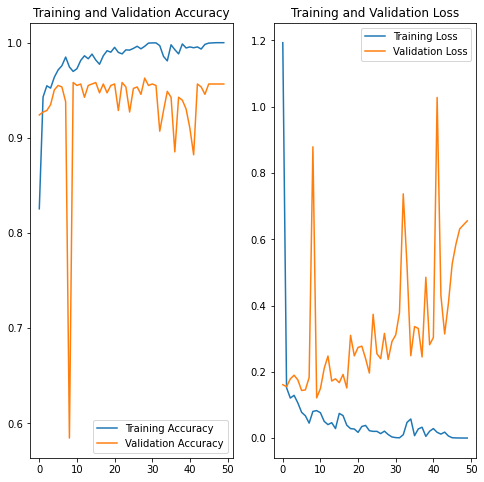

In [20]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run Predictions on testing data

- The testing dataset will be uploaded
- The model will be tested on the testing dataset

In [35]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "data/test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1285 files belonging to 3 classes.


In [36]:
class_names = test_data.class_names
class_names

['COVID19', 'NORMAL', 'PNEUMONIA']

In [53]:
# evaluate the model on the testing data
score = resnet_model.evaluate(test)

41/41 [==============================] - 123s 3s/step - loss: 0.3661 - accuracy: 0.9696


- we got 96.96% accuracy on testing data

In [54]:
for image_batch, labels_batch in test_data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 2 1 2 1 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2]


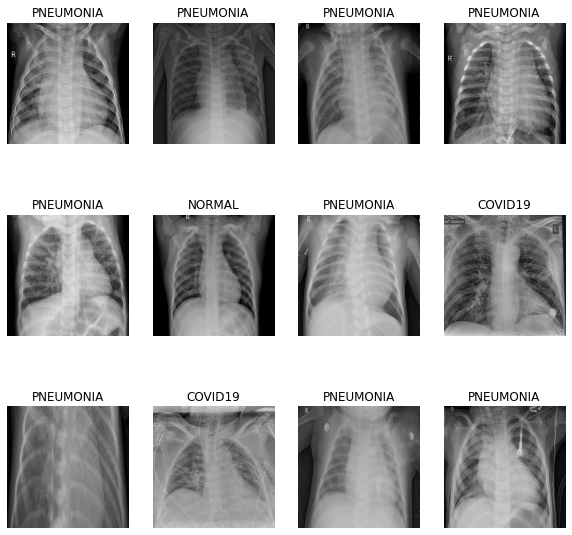

In [55]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in test_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [56]:
# test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

first image to predict
actual label: PNEUMONIA
1/1 [==============================] - 2s 2s/step
predicted label: PNEUMONIA


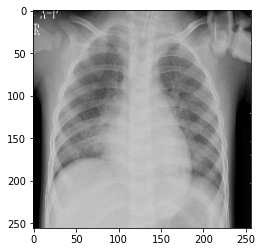

In [57]:
import numpy as np
for images_batch, labels_batch in test_data.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = resnet_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 122ms/step


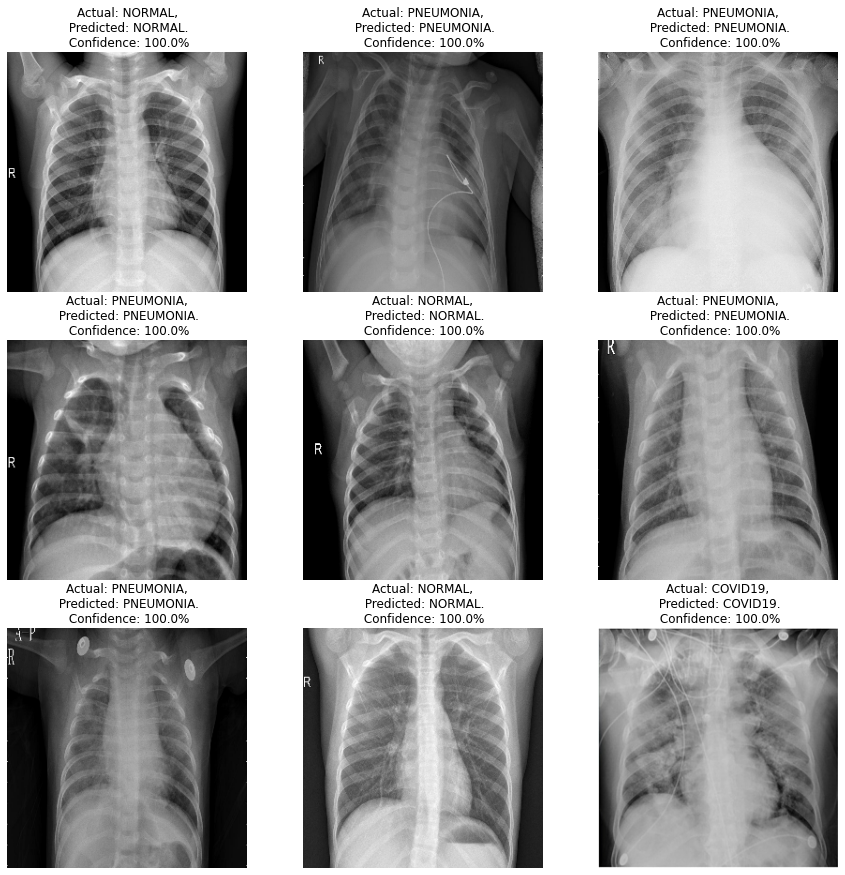

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Saving the model

In [52]:
resnet_model.save("corona.h5")